In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#fun = lambda x: 2*x**2 + 16/x; a00 = 0.5; b00 = 3
# fun = lambda x: x**2 + 54/x; a00 = 0.2; b00 = 8
fun = lambda x: -np.exp(-x)*np.sin(x); a00 = 0; b00 = 1.5
# fun = lambda x: x**2 + 4*np.cos(x); a00 = 1; b00 = 3

# Métodos basados en gradiente

## Derivada en un punto

<IPython.core.display.Javascript object>


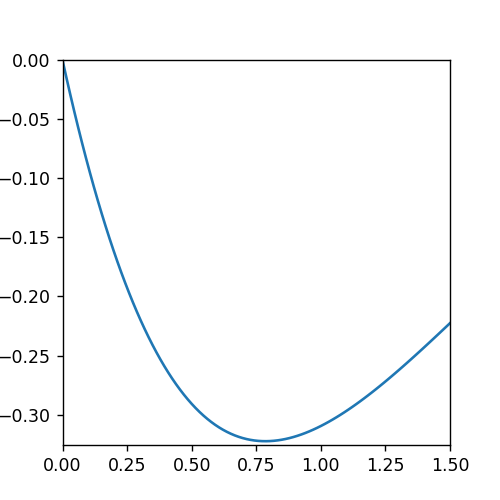

In [3]:
a0 = a00
b0 = b00

t = np.linspace(a0, b0,100)
F = fun(t)

mi = min(F); ma = max(F)
graf = [mi,ma]

#fig = plt.figure(figsize=(9.6, 7.2))
plt.figure(figsize=(4, 4))
plt.plot(t,F)
plt.ylim(mi-0.01*np.abs(mi),ma+0.01*np.abs(ma))
plt.xlim(a0,b0)


h = 1e-6
punto = 2.9
pas = 0.2
m = (fun(punto+h) - fun(punto))/h
pasgr = min(abs(10/m),pas)
b = -m*punto + fun(punto)

t1 = np.linspace(punto-pasgr,punto+pasgr,10)
plt.plot(t1, m*t1+b,color='k')

## Búsqueda del mínimo con gradiente descendente

<IPython.core.display.Javascript object>


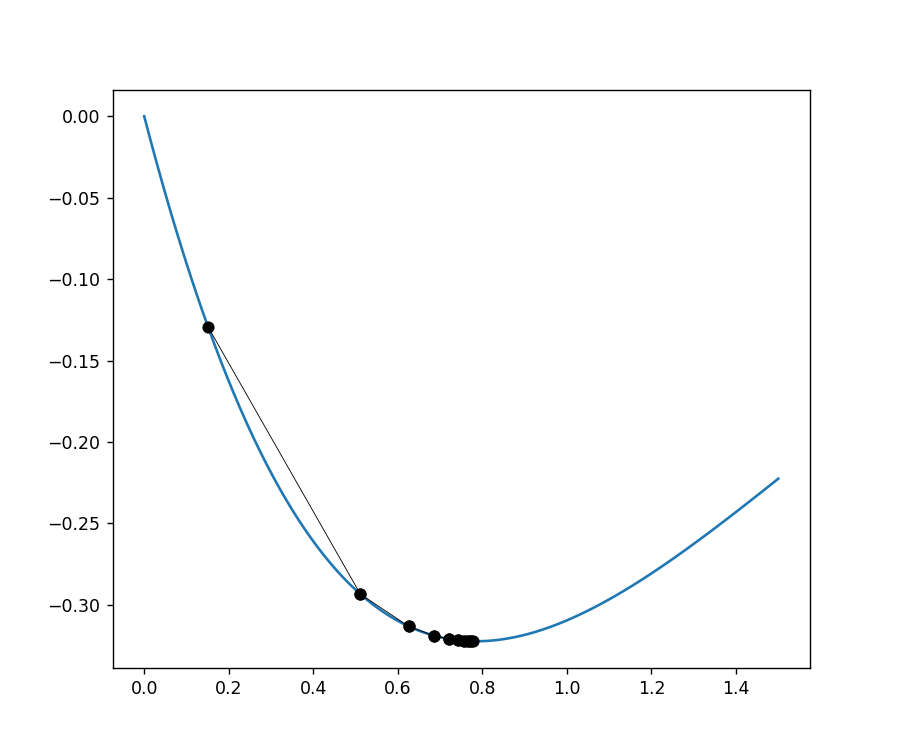

In [4]:
fig = plt.figure(figsize=(7.2, 6.0))
plt.plot(t,fun(t))
tol = 1e-2
pi = (b0-a0)*np.random.rand()+a0
omega = 0.5
m = np.inf


while np.abs(m) > tol:
    m = (fun(pi+h) - fun(pi))/h;
    pi_new =  pi - omega*m;
    plt.plot([pi, pi_new],[fun(pi), fun(pi_new)],'ko-',linewidth=0.5, markersize=6)
    pi = pi_new;
    fig.canvas.draw()
    plt.pause(0.8)

## Paso a paso

<IPython.core.display.Javascript object>


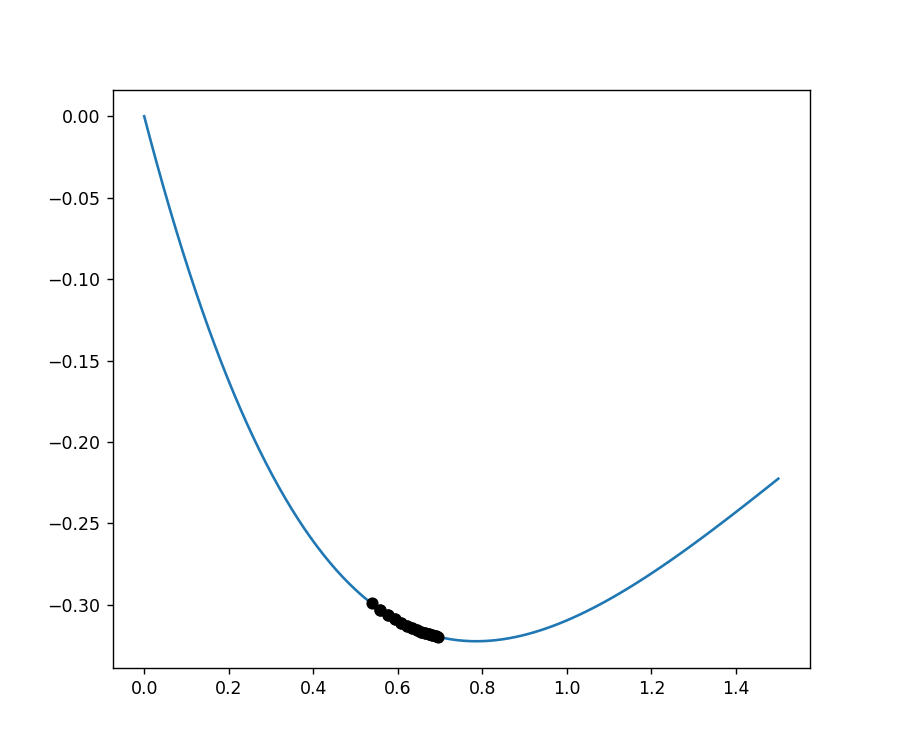

In [28]:
fig = plt.figure(figsize=(7.2, 6.0))
plt.plot(t,fun(t))
tol = 1e-5
pi = (b0-a0)*np.random.rand()+a0
omega = 0.1
m = np.inf

def onclick(event):
    global pi, omega, tol, m, pi_new
    
    if np.abs(m) > tol:
        m = (fun(pi+h) - fun(pi))/h;
        pi_new =  pi - omega*m;
        plt.plot([pi, pi_new],[fun(pi), fun(pi_new)],'ko-',linewidth=0.5, markersize=6)
        pi = pi_new;
        fig.canvas.draw()
        plt.pause(0.2)
        

cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Graficar en 3D

<IPython.core.display.Javascript object>


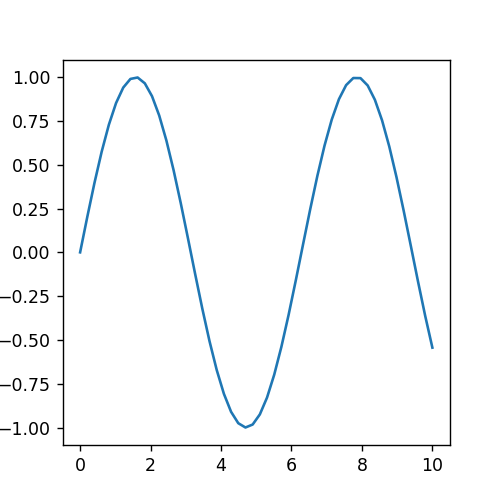

In [10]:
t = np.linspace(0,10)
y = np.sin(t)

plt.figure(figsize=(4,4))
plt.plot(t,y)


In [10]:
x = [-2,-1,0,1,2]
y = [-4,-3,-2,-1,0]

X,Y = np.meshgrid(x,y)
print(X)
print(Y)

[[-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]]
[[-4 -4 -4 -4 -4]
 [-3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]]


<IPython.core.display.Javascript object>


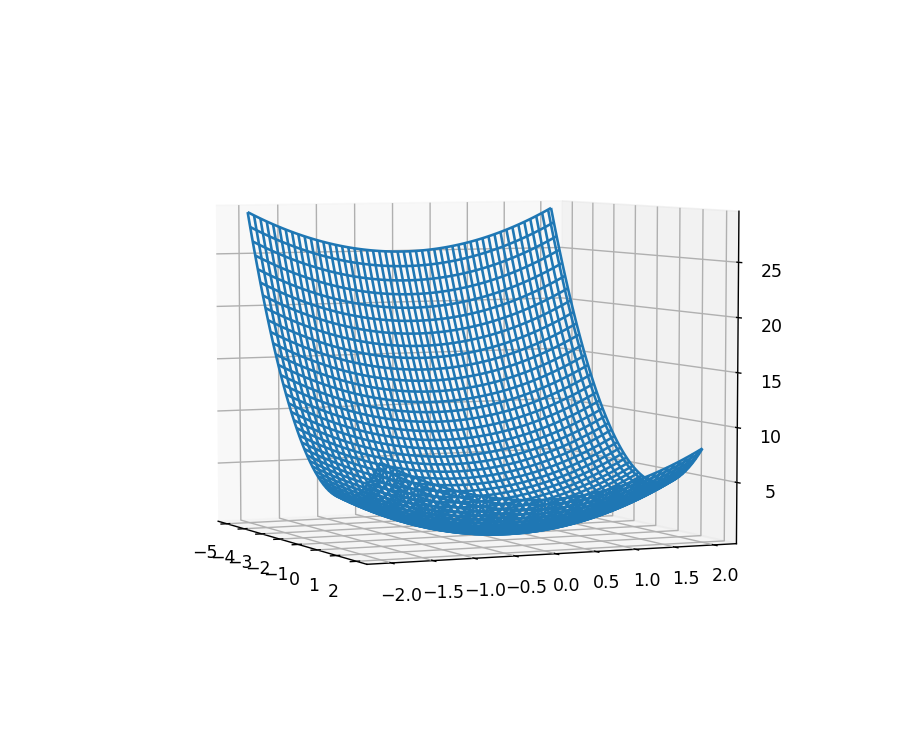

In [12]:
from mpl_toolkits.mplot3d import Axes3D

Pr = lambda x,y: x**2 + y**2

# x = [-2,-1,0,1,2]
# y = [-4,-3,-2,-1,0]
x = np.linspace(-5,2,500)
y = np.linspace(-2,2,100)
X,Y = np.meshgrid(x,y)

Z = Pr(X,Y)

fig = plt.figure(figsize=(7.2, 6.0))
ax = fig.add_subplot(111, projection='3d')
C = ax.plot_wireframe(X,Y,Z, cmap='hot')#,rstride=20,cstride=20)

#fig.colorbar(C, shrink=0.5, aspect=5)

t [-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727  1

<IPython.core.display.Javascript object>


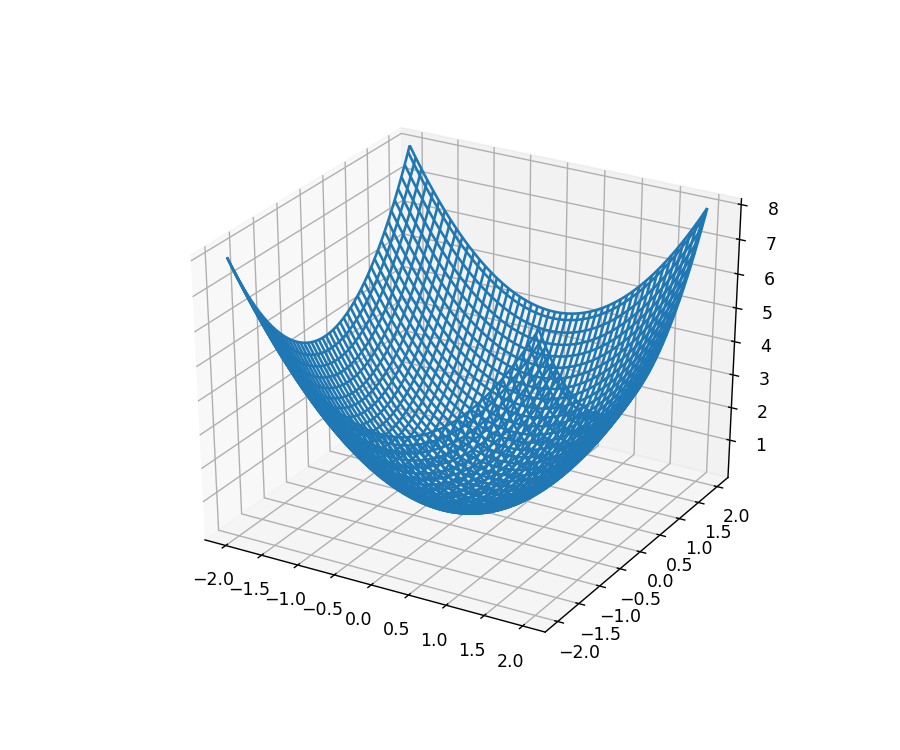

In [13]:
from mpl_toolkits.mplot3d import Axes3D


#F = lambda x,y: (x**2 + y - 11)**2 + (x + y**2 - 7)**2; x_inf = -6; x_sup = 6
F = lambda x,y: x**2+y**2; x_inf = -2; x_sup = 2;

t = np.linspace(x_inf,x_sup,100);
XX, YY = np.meshgrid(t,t);
print('t', t)
print('XX=',XX)
print('YY=',YY)

AA = F(XX,YY);

fig = plt.figure(figsize=(7.2, 6.0))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(XX,YY,AA)#,rstride=20,cstride=20)

<IPython.core.display.Javascript object>


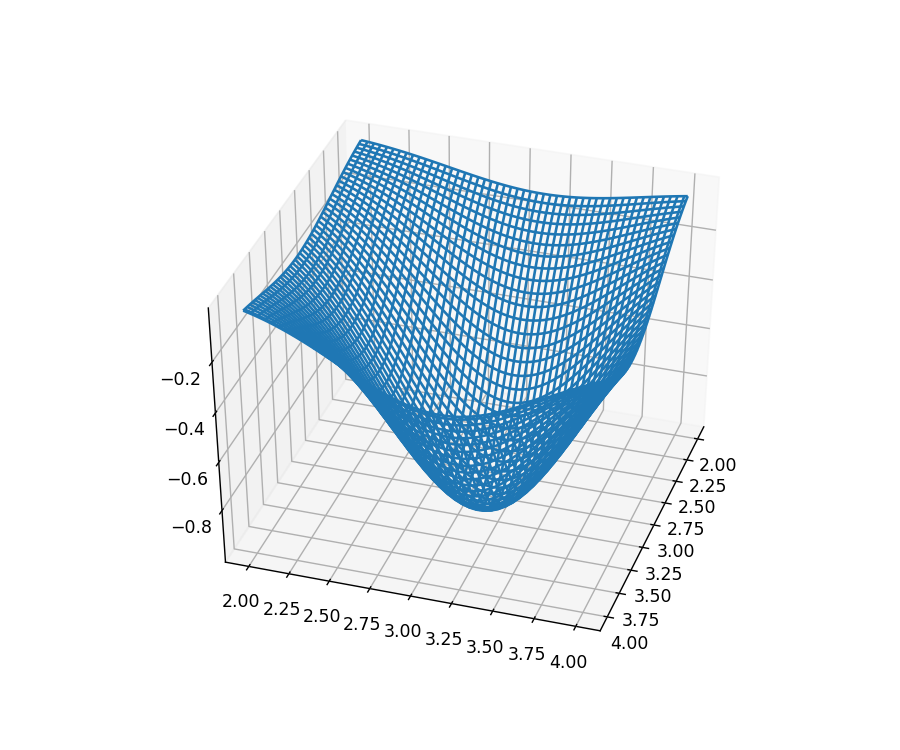

In [14]:
from mpl_toolkits.mplot3d import Axes3D


#F = lambda x,y: (x**2 + y - 11)**2 + (x + y**2 - 7)**2; x_inf = -6; x_sup = 6
F = lambda x,y: -np.cos(x)*np.cos(y)*np.exp(-(x-np.pi)**2 - (y - np.pi)**2); x_inf = 2; x_sup = 4;

t = np.linspace(x_inf,x_sup,100)
XX, YY = np.meshgrid(t,t)

AA = F(XX,YY)

fig = plt.figure(figsize=(7.2, 6.0))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(XX,YY,AA)#,rstride=20,cstride=20)
fig.canvas.draw()

#Parámetros para la búsqueda
tol = 1e-2
h = 1e-3

<IPython.core.display.Javascript object>


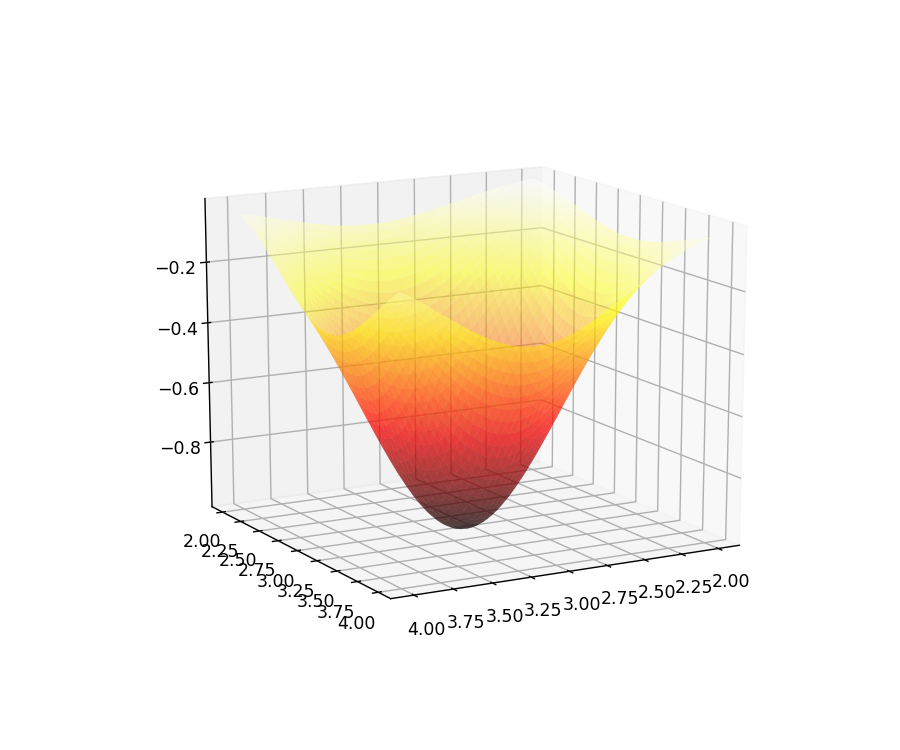

In [16]:
fig = plt.figure(figsize=(7.2, 6.0))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX,YY,AA,cmap='hot',alpha=0.5)
ax.view_init(50,35)
fig.canvas.draw()

## Búsqueda en 3D con Gradiente Descendente

<IPython.core.display.Javascript object>


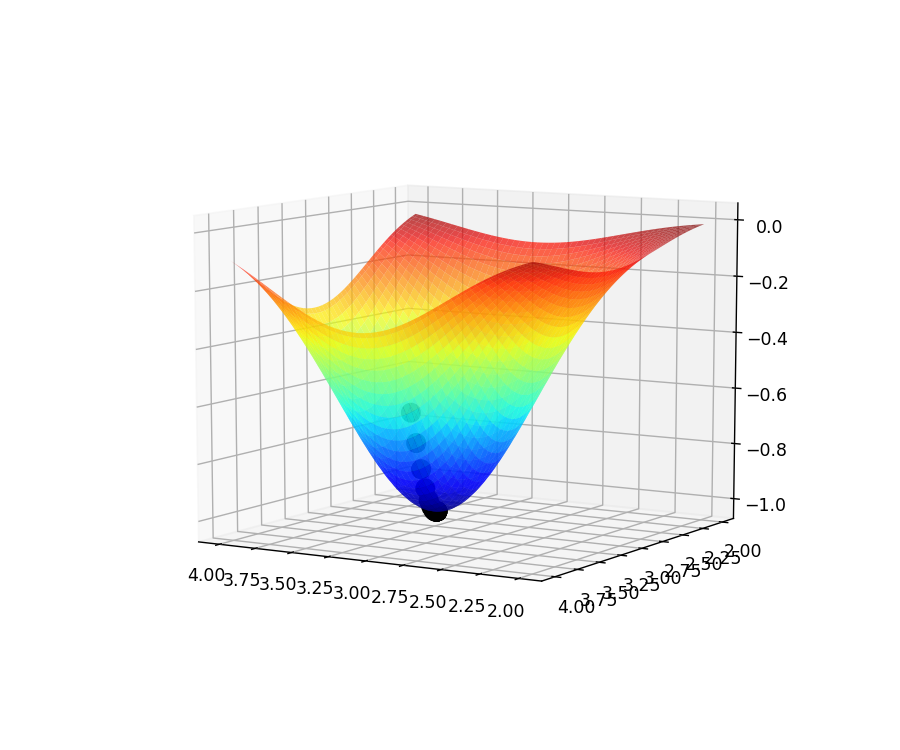

In [18]:
fig = plt.figure(figsize=(7.2, 6.0))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX,YY,AA,cmap='jet',alpha=0.7)
ax.view_init(50,35)
fig.canvas.draw()
#ax.scatter(0,0,2000,color='k',s=50)


x = (x_sup-x_inf)*np.random.rand()+x_inf
y = (x_sup-x_inf)*np.random.rand()+x_inf

omega = 0.1
dx = np.inf 
dy = np.inf
itera = 0

while abs(dx) > tol or abs(dy) > tol:
    dx = (F(x+h,y) - F(x,y))/h
    dy = (F(x,y+h) - F(x,y))/h
    x_new = x - omega*dx
    y_new = y - omega*dy
    vec = np.array([x,x_new])
    vec_new = np.array([y,y_new])
    ax.scatter(vec,vec_new,[F(vec[0],vec_new[0]),F(vec[1],vec_new[1])],color='k',s=110)
    x = x_new
    y = y_new
    fig.canvas.draw()
    plt.pause(0.4)
    itera += 1
    
#ax.scatter?


## Gráficos de Contornos

<IPython.core.display.Javascript object>


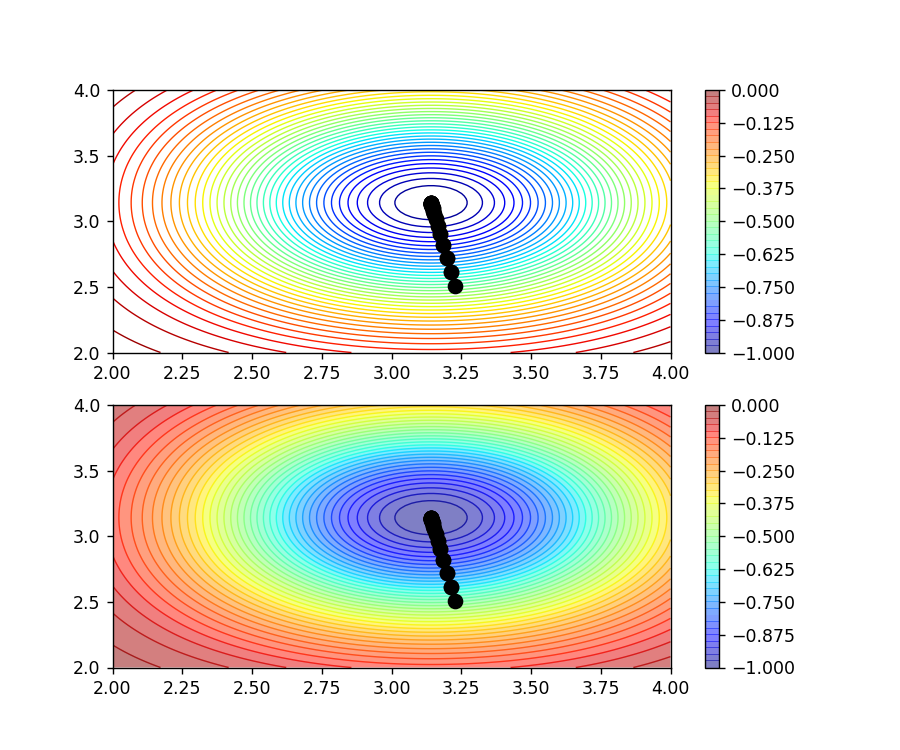

In [20]:
lvls = 45

fig = plt.figure(figsize=(7.2, 6.0))
ax1 = fig.add_subplot(211)
ax1.contour(XX,YY,AA,lvls,cmap='jet',alpha=1,linewidths=0.8)

ax2 = fig.add_subplot(212)
ax2.contour(XX,YY,AA,lvls,cmap='jet',alpha=0.8,linewidths=0.8)
cb = ax2.contourf(XX,YY,AA,lvls,cmap='jet',alpha=0.5,antialiased=True)
fig.canvas.draw()
fig.colorbar(cb,ax=ax1)
fig.colorbar(cb,ax=ax2)

x = (x_sup-x_inf)*np.random.rand()+x_inf
y = (x_sup-x_inf)*np.random.rand()+x_inf

omega = 0.1 #modificar de ser necesario
dx = np.inf 
dy = np.inf
itera = 0

while abs(dx) > tol or abs(dy) > tol:
    dx = (F(x+h,y) - F(x,y))/h
    dy = (F(x,y+h) - F(x,y))/h
    x_new = x - omega*dx
    y_new = y - omega*dy
    vec = np.array([x,x_new])
    vec_new = np.array([y,y_new])
    ax1.plot(vec,vec_new,'ko',markersize=8)
    ax2.plot(vec,vec_new,'ko',markersize=8)
    x = x_new
    y = y_new
    fig.canvas.draw()
    plt.pause(0.3)
    itera += 1


In [ ]:
print( 5 or)